In [177]:
import pandas as pd 
import numpy as np 

# Linear Regression

In [178]:
dataset = pd.read_csv('cleaned_panic_data.csv')
dataset

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,23,Female,0,11,Stress,114,Yes,Yes,Yes,...,Yes,Depression,Yes,5,3,7.9,5,No,Yes,8
1196,1197,41,Male,0,44,Stress,109,Yes,No,No,...,Yes,Anxiety,Yes,4,3,4.3,7,No,Yes,1
1197,1198,50,Male,7,16,Phobia,133,No,Yes,Yes,...,No,Depression,Yes,1,0,8.5,7,No,Yes,8
1198,1199,46,Male,2,17,PTSD,115,Yes,Yes,No,...,Yes,Anxiety,No,4,5,5.4,3,Yes,Yes,9


In [179]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Heart_Rate              1200 non-null   int64  
 7   Sweating                1200 non-null   object 
 8   Shortness_of_Breath     1200 non-null   object 
 9   Dizziness               1200 non-null   object 
 10  Chest_Pain              1200 non-null   object 
 11  Trembling               1200 non-null   object 
 12  Medical_History         1200 non-null   object 
 13  Medication              1200 non-null   object 
 14  Caffeine_Intake         1200 non-null   

In [191]:
data = pd.get_dummies(dataset, columns=['Trigger', 'Medical_History','Gender'], drop_first=False)
for col in ['Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain', 'Trembling','Medication','Smoking','Therapy']:
    dataset[col] = dataset[col].map({'Yes': 1, 'No': 0})

data.head()


,ID,Age,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,Trembling,...,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Gender_Female,Gender_Male,Gender_Non-binary
0,1,56,9,5,134,1,0,1,1,0,...,False,False,False,False,True,False,False,True,False,False
1,2,46,8,9,139,1,1,0,0,0,...,False,False,False,True,False,False,True,False,True,False
2,3,32,6,31,141,0,1,1,0,0,...,True,False,False,False,False,True,False,True,False,False
3,4,60,5,20,109,1,1,0,0,1,...,False,False,False,False,False,True,False,False,True,False
4,5,25,6,10,101,1,0,1,1,1,...,False,False,False,False,False,True,False,False,False,True


In [181]:
data.dtypes

ID                              int64
Age                             int64
Panic_Attack_Frequency          int64
Duration_Minutes                int64
Heart_Rate                      int64
Sweating                       object
Shortness_of_Breath            object
Dizziness                      object
Chest_Pain                     object
Trembling                      object
Medication                     object
Caffeine_Intake                 int64
Exercise_Frequency              int64
Sleep_Hours                   float64
Alcohol_Consumption             int64
Smoking                        object
Therapy                        object
Panic_Score                     int64
Trigger_Caffeine                 bool
Trigger_PTSD                     bool
Trigger_Phobia                   bool
Trigger_Social Anxiety           bool
Trigger_Stress                   bool
Medical_History_Anxiety          bool
Medical_History_Depression       bool
Medical_History_PTSD             bool
Gender_Femal

In [192]:
bool_columns = ['Trigger_Caffeine','Trigger_Social Anxiety','Trigger_Stress']
for col in bool_columns:
    data[col] = data[col].astype(int)
data.head()

,ID,Age,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,Trembling,...,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Gender_Female,Gender_Male,Gender_Non-binary
0,1,56,9,5,134,1,0,1,1,0,...,False,False,0,0,True,False,False,True,False,False
1,2,46,8,9,139,1,1,0,0,0,...,False,False,0,1,False,False,True,False,True,False
2,3,32,6,31,141,0,1,1,0,0,...,True,False,0,0,False,True,False,True,False,False
3,4,60,5,20,109,1,1,0,0,1,...,False,False,0,0,False,True,False,False,True,False
4,5,25,6,10,101,1,0,1,1,1,...,False,False,0,0,False,True,False,False,False,True


In [193]:
float_columns_with_bool = ['Trigger_PTSD','Trigger_Phobia','Medical_History_Anxiety','Medical_History_Depression','Medical_History_PTSD','Gender_Female','Gender_Male','Gender_Non-binary']  
for col in float_columns_with_bool:
    data[col] = data[col].astype(float)
data.head()

,ID,Age,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,Trembling,...,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Gender_Female,Gender_Male,Gender_Non-binary
0,1,56,9,5,134,1,0,1,1,0,...,0.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,46,8,9,139,1,1,0,0,0,...,0.0,0.0,0,1,0.0,0.0,1.0,0.0,1.0,0.0
2,3,32,6,31,141,0,1,1,0,0,...,1.0,0.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,60,5,20,109,1,1,0,0,1,...,0.0,0.0,0,0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,25,6,10,101,1,0,1,1,1,...,0.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,1.0


In [194]:
#Independent and Dependent Variable
X=data.drop(columns=['Panic_Score'])
y=data['Panic_Score']


In [195]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
X_train

,ID,Age,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,Trembling,...,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Gender_Female,Gender_Male,Gender_Non-binary
522,523,46,1,42,157,1,1,1,1,0,...,0.0,0.0,0,0,0.0,0.0,1.0,0.0,1.0,0.0
213,214,36,6,15,151,0,1,1,0,0,...,1.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
120,121,41,2,5,109,1,0,0,1,0,...,0.0,0.0,1,0,1.0,0.0,0.0,1.0,0.0,0.0
917,918,64,1,14,84,1,0,0,1,0,...,0.0,0.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0
1067,1068,56,0,17,125,0,1,1,0,1,...,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1045,62,2,21,84,0,1,0,1,0,...,0.0,1.0,0,0,0.0,0.0,1.0,1.0,0.0,0.0
1095,1096,55,9,39,127,1,0,1,0,0,...,1.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
1130,1131,63,9,9,137,1,1,1,0,1,...,1.0,0.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
860,861,64,0,42,89,0,1,0,0,1,...,1.0,0.0,0,0,0.0,0.0,1.0,1.0,0.0,0.0


In [196]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [197]:
X_train = scaler.fit_transform(X_train)

In [198]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.64848848,  0.81428062, -0.44883215, ...,  1.0767465 ,
        -0.89155583, -0.3221968 ],
       [ 0.74730874, -0.50405357,  0.24231177, ..., -0.9287237 ,
         1.12163475, -0.3221968 ],
       [-1.45237597,  0.00863195, -0.10326019, ..., -0.9287237 ,
         1.12163475, -0.3221968 ],
       ...,
       [-1.43798013,  0.81428062, -0.79440412, ..., -0.9287237 ,
         1.12163475, -0.3221968 ],
       [ 0.55440446,  0.66779905, -1.48554804, ..., -0.9287237 ,
         1.12163475, -0.3221968 ],
       [-1.58481772,  1.69317008, -1.48554804, ...,  1.0767465 ,
        -0.89155583, -0.3221968 ]])

In [199]:
total_elements = X_test.size
total_elements


10080

In [200]:
rows, cols = X_test.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 360, Columns: 28


In [201]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [202]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [203]:
train_r2 = regression.score(X_train, y_train)
print(f'Training R-squared: {train_r2}')

Training R-squared: 0.024191761774500664


In [204]:
test_r2 = regression.score(X_test, y_test)
print(f'Testing R-squared: {test_r2}')

Testing R-squared: -0.027757081149636154


In [205]:
mse=cross_val_score(regression,X_train,y_train, scoring= 'neg_mean_squared_error',cv=10)

In [206]:
np.mean(mse)

np.float64(-8.046831069220673)

In [207]:
#prediction
reg_pred = regression.predict(X_test)
reg_pred

array([5.73223017, 4.88865492, 5.29674267, 5.96642374, 5.59015011,
       6.898983  , 5.06116082, 5.12453626, 5.36224063, 5.13942948,
       5.67227433, 5.38949108, 5.53643558, 5.70386161, 4.9653016 ,
       6.03663569, 5.61904481, 5.78020859, 6.45024012, 5.62773157,
       5.8024805 , 5.14615134, 5.18326228, 4.86020081, 5.62194658,
       5.85096829, 5.20129384, 6.1838171 , 4.9555472 , 5.95880722,
       5.64689749, 5.24824769, 6.25318634, 5.08083281, 4.70776852,
       5.15503921, 5.12583333, 5.32197974, 5.3899285 , 6.06747135,
       6.19786976, 5.98999568, 5.58038352, 6.30771532, 4.98375516,
       5.33367332, 5.17931835, 6.01723188, 6.06431077, 5.73144193,
       6.23099542, 5.73805228, 4.72718052, 6.51316623, 5.56019129,
       5.56828334, 5.23077664, 5.71792505, 5.55456855, 4.78704451,
       6.0661667 , 4.95890909, 4.82674996, 5.23085155, 5.69972214,
       5.7444343 , 5.24389684, 5.15688816, 4.95111988, 5.58454562,
       4.95712533, 5.19331766, 4.82900824, 4.85334295, 5.76224

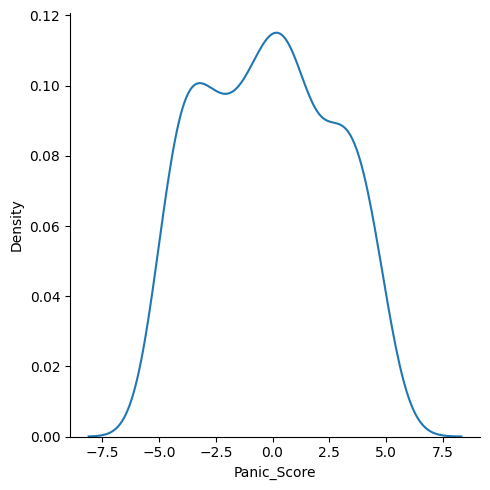

In [208]:
import seaborn as sns 
sns.displot(reg_pred-y_test, kind='kde')

# Random Forest

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [216]:
best_rf = grid_search.best_estimator_

# Train the best model
best_rf.fit(X_train, y_train)



RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [217]:
rf_pred_test = best_rf.predict(X_test)
test_r2 = r2_score(y_test, rf_pred_test)
print(f"Random Forest R-squared on Test Set (Tuned): {test_r2}")

Random Forest R-squared on Test Set (Tuned): -0.028334383104505756


In [218]:
rf_pred_train = best_rf.predict(X_train)
train_r2 = r2_score(y_train, rf_pred_train)
print(f"Random Forest R-squared on Training Set (Tuned): {train_r2}")

Random Forest R-squared on Training Set (Tuned): 0.5644672099143596
